In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('results/single_node_allreduce.csv', names=['Backend + Device', 'Tensor Size', 'World Size', 'Time'])
df

,Backend + Device,Tensor Size,World Size,Time
0,GLOO + CPU,512 KB,2,0.000833
1,GLOO + CPU,512 KB,4,0.002520
2,GLOO + CPU,512 KB,6,0.008450
3,GLOO + CPU,1 MB,2,0.001560
4,GLOO + CPU,1 MB,4,0.009450
...,...,...,...,...
58,NCCL + CUDA,500 MB,4,0.000230
59,NCCL + CUDA,500 MB,6,0.000615
60,NCCL + CUDA,1 GB,2,0.000257
61,NCCL + CUDA,1 GB,4,0.000242


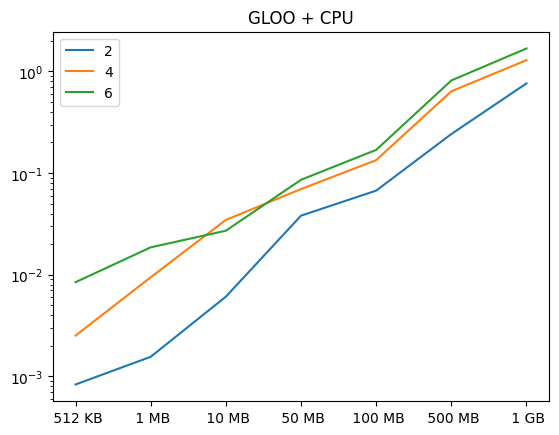

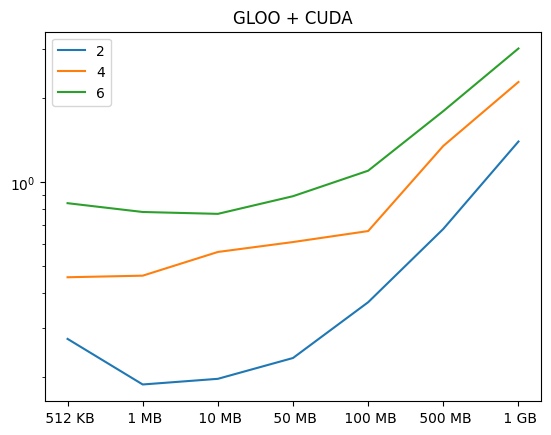

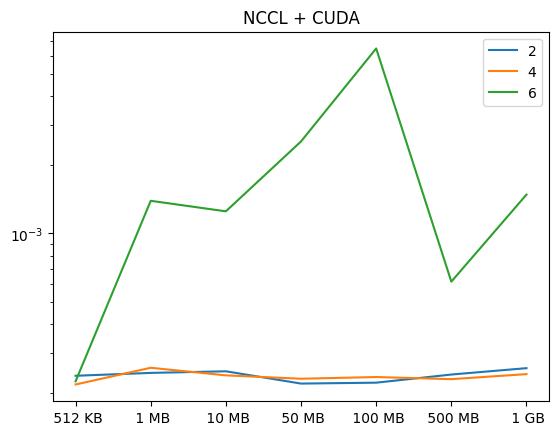

In [6]:
for backend_device in df['Backend + Device'].unique():
    sub_df = df[df['Backend + Device'] == backend_device]
    # print(sub_df)
    plt.title(backend_device)
    for world_size in sub_df['World Size'].unique():
        sub_sub_df = sub_df[sub_df['World Size'] == world_size]
        plt.semilogy(sub_sub_df['Tensor Size'], sub_sub_df['Time'], label=f'{world_size}')
    plt.legend()
    plt.show()